

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

i will analize the TMDB movie data to make operations on it and answer the following questions ,  which the most company has a budget? , how many null data in the data set ? ,what is the total budget and total revenue in every year ? , what is the maximume and the minimume budget ? ,which movie has the largest revenue ?,  and which the most year has a revenue? and more other qustions .

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline 

# data wrangling

in this section we will load the file and take a look on its information and properities 

## loading the csv file and displaying the head of the file 

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## displaying the information about data set

In [4]:
#displaying data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



# data cleaning

## first i will remove the unimportant columns

In [6]:
# dropping unusefule data 
df.drop(['id' , 'imdb_id' , 'homepage' , 'tagline' , 'keywords'] , axis=1 , inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## how many null data in the data set ?

In [7]:
#clculating the sum of null data in the data set 
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## fill empty cells by 'unknown ' word 

In [8]:
#replacing null data with unkown word
df.fillna('unkown' , inplace=True)
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

## deleting data in these three columns which equal to zero

In [9]:
#dropping data which equal to zero in these columns 
df.drop((df[df.runtime == 0]).index ,inplace = True)
df.drop((df[df.budget == 0]).index ,inplace = True)
df.drop((df[df.revenue == 0]).index ,inplace = True)
df.reset_index(inplace=True , drop=True)

df.shape

(3855, 16)

## how many data is duplicated ?

In [10]:
#calculating the sum of null data again to see if our work done successfully
sum(df.duplicated())

1

## removing duplicated data 

In [11]:
# remove duplicated data
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

# functionality

In [12]:
# two functions to get the mean for year and the max for the year 
def get_mean(year, column):
     m = df[df.release_year == year][column].mean()
     return m
def get_max(year, column):
     mx = df[df.release_year == year][column].max()
     return mx

<a id='eda'></a>
## Exploratory Data Analysis



In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
# display the number of columns and entities in the data set 
df.shape

(3854, 16)

## what is the total budget and total revenue in every year ?

In [15]:
# getting the total budget and total revenue in each year 
df1 = df.groupby('release_year')['budget' , 'revenue' ].sum()
df1

,budget,revenue
release_year,,
1960,20806948,129005000
1961,38637000,337720188
1962,39450000,206329846
1963,61115000,176526882
1964,33935161,328613548
1965,58800000,458081854
1966,32268000,84736689
1967,95500000,731834637
1968,53950000,222221762


## what is the maximume and the minimume budget ?

the maximume budget 

In [16]:
# the maximume year has a budget
df1.loc[df1['budget'].idxmax()]

budget      8567922778
revenue    24350666103
Name: 2013, dtype: int64

the minimume budget

In [17]:
# the minimume year has a budget
df1.loc[df1['budget'].idxmin()]

budget      20806948
revenue    129005000
Name: 1960, dtype: int64

## which year have the largest budget  , revenue and how much it ?

the year which have the largest budget 

In [18]:
# getting the year of the maximume budget 
df1.loc[df1['budget'].idxmax()]

budget      8567922778
revenue    24350666103
Name: 2013, dtype: int64

the year which have the largest revenue

In [19]:
# getting the year of thr maximume revenue
df1.loc[df1['revenue'].idxmax()]

budget      7170777528
revenue    26202922801
Name: 2015, dtype: int64

## what is the maximume and the minimume revenue ?

the maximume revenue

In [20]:
# the maximume year has a revenue
df1.loc[df1['revenue'].idxmax()]

budget      7170777528
revenue    26202922801
Name: 2015, dtype: int64

the minimume revenue

In [21]:
# the minimume year has a revenue
df1.loc[df1['revenue'].idxmin()]

budget     32268000
revenue    84736689
Name: 1966, dtype: int64

## the average of budget and revenue in every year  

In [22]:
# getting the average of buget and revenue for every year 
df1 = df.groupby('release_year')['budget' , 'revenue' ].mean()
df1

,budget,revenue
release_year,,
1960,4.161390e+06,2.580100e+07
1961,3.863700e+06,3.377202e+07
1962,5.635714e+06,2.947569e+07
1963,1.018583e+07,2.942115e+07
1964,4.847880e+06,4.694479e+07
1965,1.176000e+07,9.161637e+07
1966,6.453600e+06,1.694734e+07
1967,7.346154e+06,5.629497e+07
1968,5.994444e+06,2.469131e+07


## the most and the least companies have a revenue 

the most company has a revenue

In [23]:
# the most production company has a revenue
df1 = df.groupby('production_companies')['budget', 'revenue'].sum()
df1.loc[df1['revenue'].idxmax()]

budget     1857000000
revenue    7648558520
Name: Walt Disney Pictures|Pixar Animation Studios, dtype: int64

the least company has a revenue 

In [24]:
# the least production company has a revenue
df1 = df.groupby('production_companies')['budget', 'revenue'].sum()
df1.loc[df1['revenue'].idxmin()]

budget     6000000
revenue          2
Name: Gramercy Pictures|Alphaville Films|View Askew Productions, dtype: int64

## the most and the least companies have a budget 

the most company has budget 

In [25]:
# the most production company has a budget 
df1 = df.groupby('production_companies')['budget', 'revenue'].sum()
df1.loc[df1['budget'].idxmax()]

budget     1987000000
revenue    6676741096
Name: DreamWorks Animation, dtype: int64

the least copany has budget 

In [26]:
# the least production company has a budget
df1=df.groupby('production_companies')['budget' , 'revenue'].sum()
df1.loc[df1['budget'].idxmin()]

budget        1
revenue    1378
Name: 120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions, dtype: int64

## which movie has the largest revenue ?

In [27]:
# getting the most movie has the largedt revenue
dff = df.groupby('original_title')['budget', 'revenue'].sum()
dff.loc[dff['revenue'].idxmax()]

budget      237000000
revenue    2781505847
Name: Avatar, dtype: int64

## the movies that have the highst vote 

In [28]:
# getting the maximume vote average 
df[df.vote_average == df.vote_average.max()]

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1428,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Framed in the 1940s for the double murder of h...,142,Drama|Crime,Castle Rock Entertainment,9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07
2806,0.283191,1200000,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,David Byrne walks onto the stage and does a so...,88,Documentary|Music,Talking Heads|Arnold Stiefel Company,11/16/84,23,8.4,1984,2.518850e+06,1.045097e+07


## how many movies for each director ? 

In [29]:
# displaying directors names with their number of movies
df.director.value_counts()

Steven Spielberg                                     27
Clint Eastwood                                       24
Ridley Scott                                         21
Woody Allen                                          18
Steven Soderbergh                                    17
Martin Scorsese                                      17
Tim Burton                                           16
Oliver Stone                                         15
Robert Zemeckis                                      15
Brian De Palma                                       15
Renny Harlin                                         15
Ron Howard                                           14
Tony Scott                                           14
Joel Schumacher                                      14
Wes Craven                                           14
Richard Donner                                       13
Francis Ford Coppola                                 13
John Carpenter                                  

## the average of budget in the last 5 years  

Text(0.5,1,'The mean budget at the last five years')

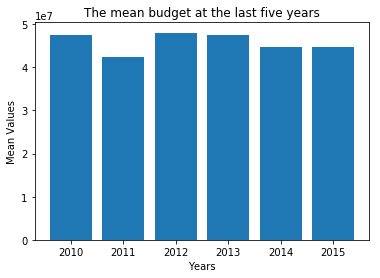

In [30]:
# getting the average of the budget in last five years and displaing them on par plot 
m_2010=get_mean(2010, 'budget')
m_2011=get_mean(2011, 'budget')
m_2012=get_mean(2012, 'budget')
m_2013=get_mean(2013, 'budget')
m_2014=get_mean(2014, 'budget')
m_2015=get_mean(2015, 'budget')

plt.bar(["2010","2011","2012","2013","2014","2015"],[m_2010,m_2011,m_2012,m_2013,m_2014,m_2015])
plt.xlabel("Years")
plt.ylabel("Mean Values")
plt.title("The mean budget at the last five years")

## the average of revenue in the last 5 years 

Text(0.5,1,'The mean revenue at the last five years')

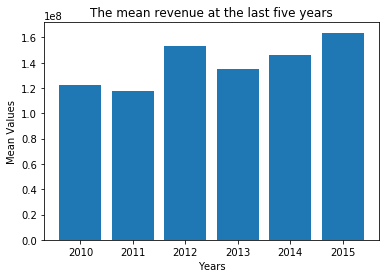

In [31]:
# getting the average of the revenue in last five years and displaing them on par plot
m_2010=get_mean(2010, 'revenue')
m_2011=get_mean(2011, 'revenue')
m_2012=get_mean(2012, 'revenue')
m_2013=get_mean(2013, 'revenue')
m_2014=get_mean(2014, 'revenue')
m_2015=get_mean(2015, 'revenue')

plt.bar(["2010","2011","2012","2013","2014","2015"],[m_2010,m_2011,m_2012,m_2013,m_2014,m_2015])
plt.xlabel("Years")
plt.ylabel("Mean Values")
plt.title("The mean revenue at the last five years")

## histogram for each column 

Text(0.5,1.08,'The relationship between each column and the rest')

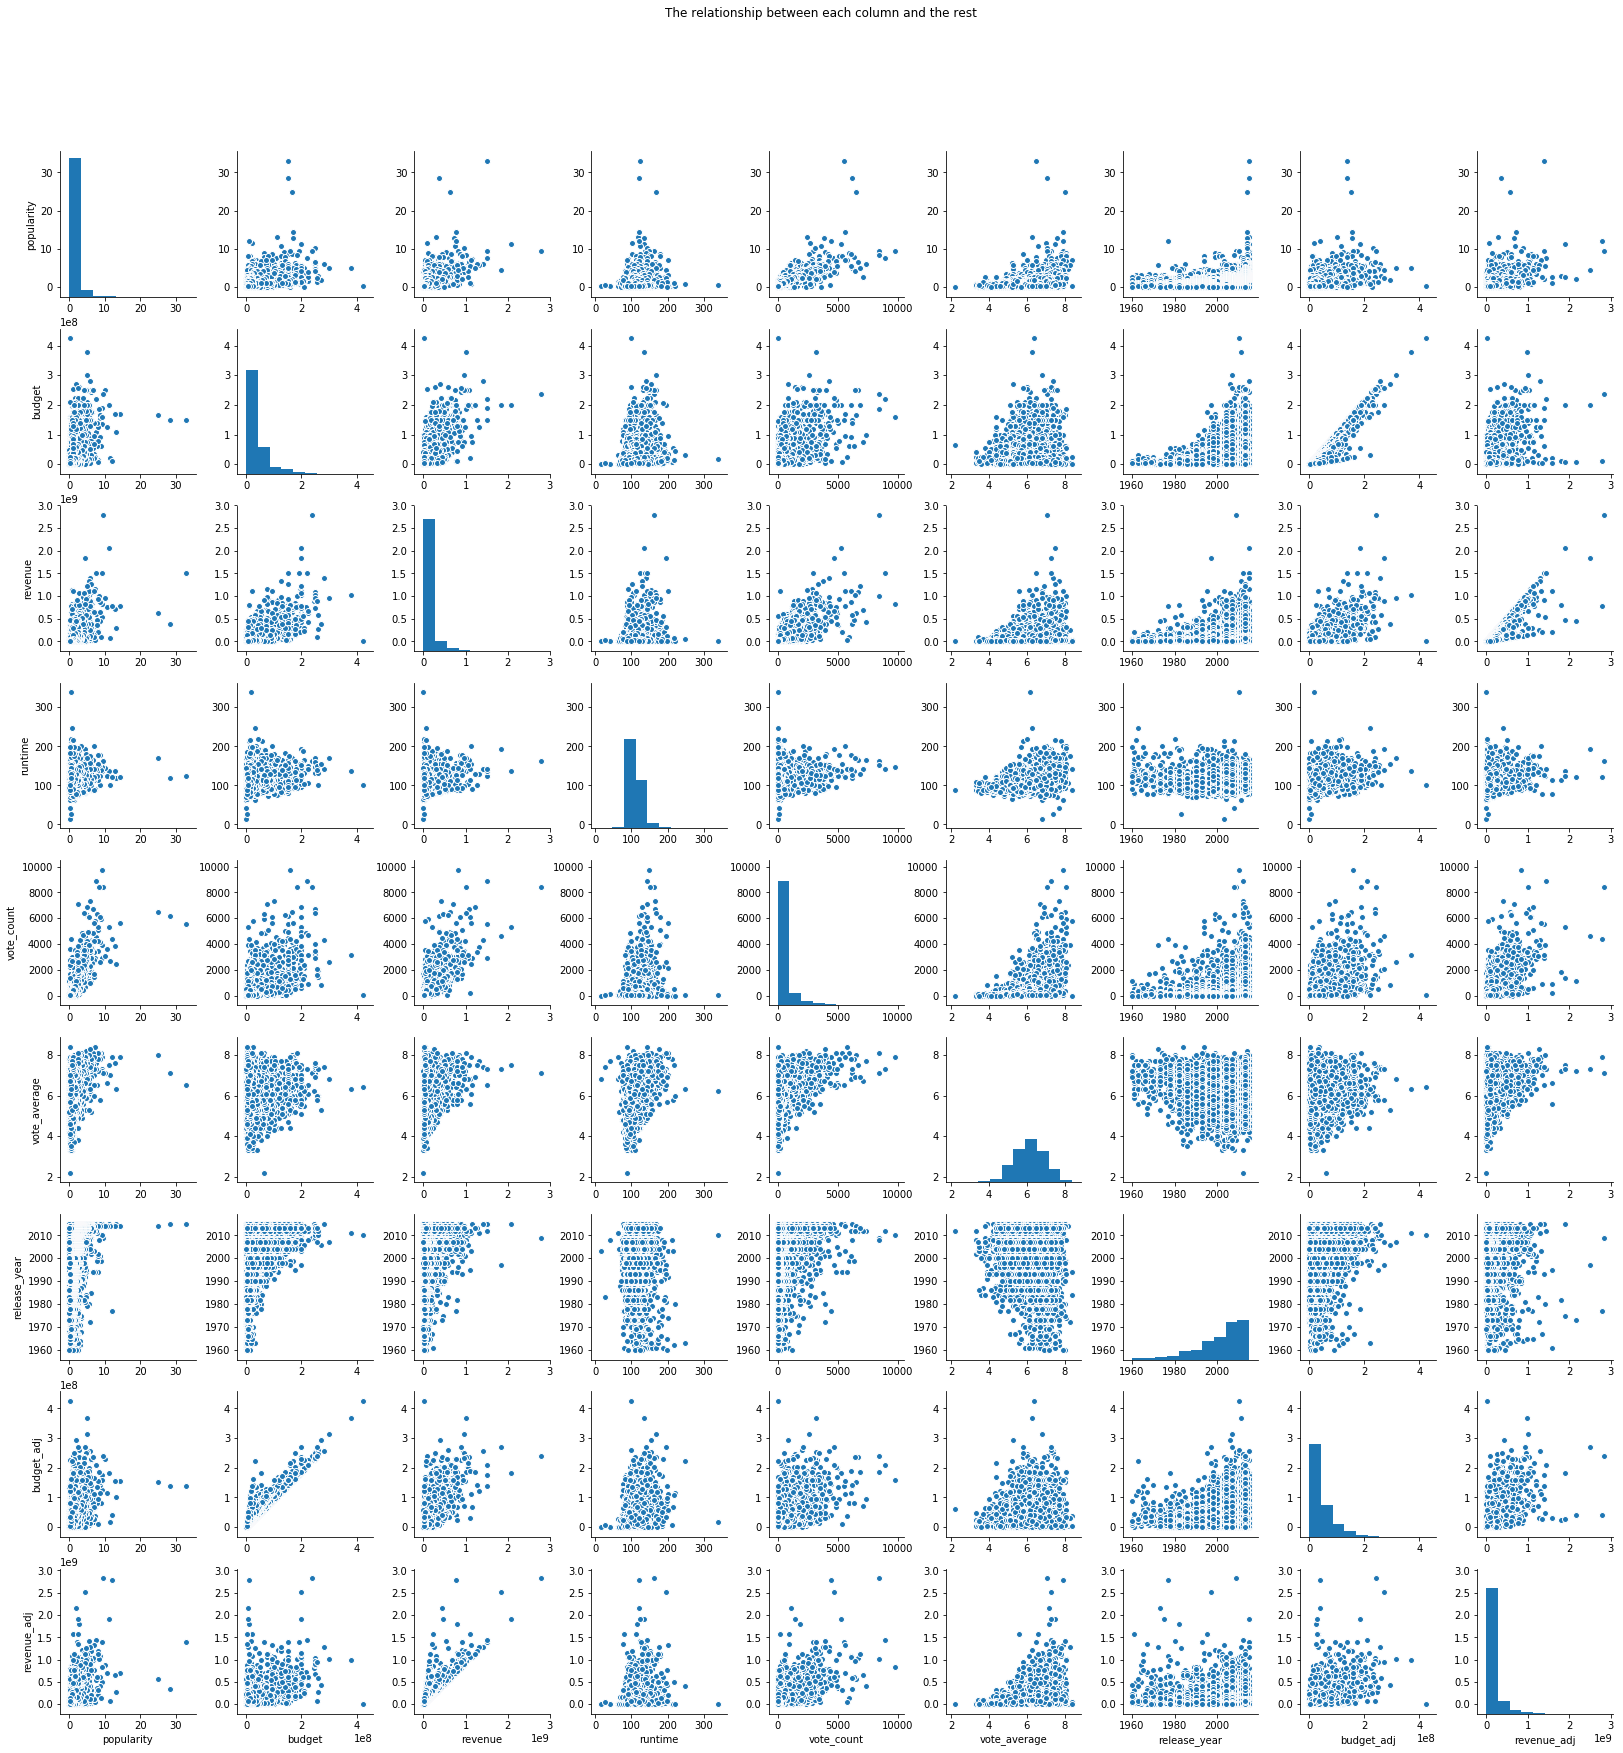

In [32]:
# displaying a pairplot for each column to take  fast look and understand how it's going 
g = sns.pairplot(df)
g.fig.suptitle("The relationship between each column and the rest", y=1.08)

## the relationship between release year and budget 

Text(0.5,1,'The relation between bdget and release year ')

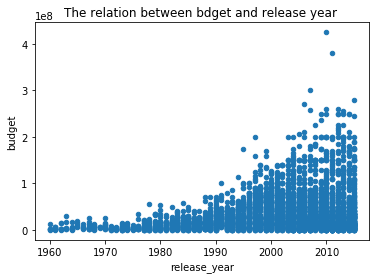

In [33]:
# displaying the relation between release year and budget in scatter plot 
df.plot(x='release_year', y='budget', kind='scatter')
plt.title("The relation between bdget and release year ")

## the relationship between budget and revenue in scatter plot

Text(0.5,1,'the relation between budget and revenue')

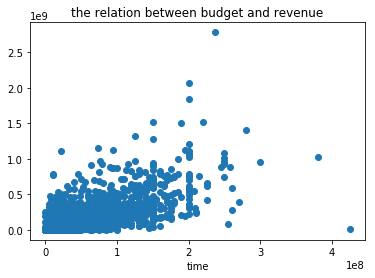

In [34]:
# displaying the relation between budget and revenue with scatter plot
plt.scatter (df['budget'], df['revenue'])
plt.xlabel('time')
plt.title("the relation between budget and revenue")

## a clear histogram for bdget and revenue 

Text(0.5,1,'The histogram for budget ')

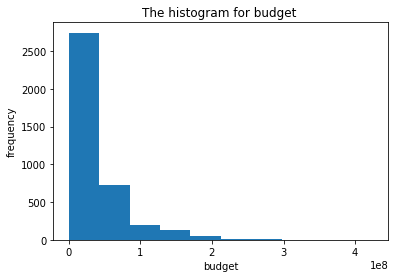

In [35]:
#This is a histogram that shown the distribution of the budget and the shape of data
plt.hist(df['budget'])
plt.xlabel("budget")
plt.ylabel("frequency")
plt.title("The histogram for budget ")


Text(0.5,1,'The histogram for revenue ')

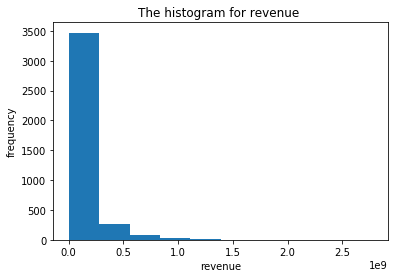

In [36]:
#This is a histogram that shown the distribution of the revenue  and the shape of data
plt.hist(df['revenue'])
plt.xlabel("revenue")
plt.ylabel("frequency")
plt.title("The histogram for revenue ")

<a id='conclusions'></a>
## Conclusions
this dataset talked about movies and all information about it and I had knew from this dataset alot of inormation like the year has the most budget and the company has the most and the least budget and revenue , and i could to exttract all important information about this data set and almost made a visualization for the most information 

### limitations :- 
                
When I begin the cleaning phase  I found that there is many unimportant colmns so i removed them , i found that                 there alot of data which equal zero in the budget and revenue so i removed it , and changed the empty data with                  'unkown' word .

i did all the best in this project ! is there something better ?


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0